# Optimization Test Problems

Wednesday, February 19th, 2025

In [183]:
# Import necessary librariies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Visualizations of select functions

#### Define a function to handle visualizing functions

In [184]:
def visualize_func(x1, x2, y, func_name="", xlim=None):
    # plot 3d graph of function
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y, cmap="plasma")
    ax.set_title(f"{func_name} Function Visualization")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_xlim(xlim)
    ax.view_init(elev=30, azim=45)
    plt.show()

### Six hump camel function

In [185]:
# Define the Six hump camel function
def six_hump_camel_func(x1, x2):
    return (4 - 2.1 * x1**2 + (x1**4) / 3) * x1**2 + x1 * x2 + (-4 + 4 * x2**2) * x2**2

In [186]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1, x2)

# Generate values of the 3rd axis
y = six_hump_camel_func(x1, x2)

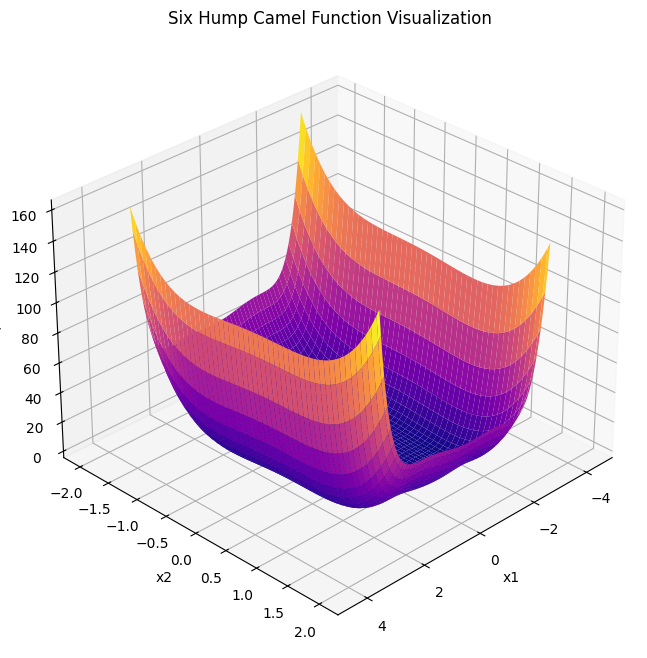

In [187]:
visualize_func(x1, x2, y, func_name="Six Hump Camel", xlim=[-5, 5])


### Michalewicz function

In [188]:
# Define the Michalewicz function in terms of tensorflow
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= tf.sin(x1) * (tf.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= tf.sin(x2) * (tf.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

In [189]:
# Test function
michalewicz_func(2.20, 1.57).numpy()

np.float32(-1.8011413)

In [190]:
# Sample points on x1 and x2 axis
x1 = np.linspace(0, np.pi, 100, dtype=np.float32)
x2 = np.linspace(0, np.pi, 100, 100, dtype=np.float32)
x1, x2 = np.meshgrid(x1, x2)

# x1 and x2 as tensors
x1_tf = tf.convert_to_tensor(x1, dtype=tf.float32)
x2_tf = tf.convert_to_tensor(x2, dtype=tf.float32)

y_tf = michalewicz_func(x1,x2) # corresponding y output of function

y = y_tf.numpy() # convert to numpy for visualization

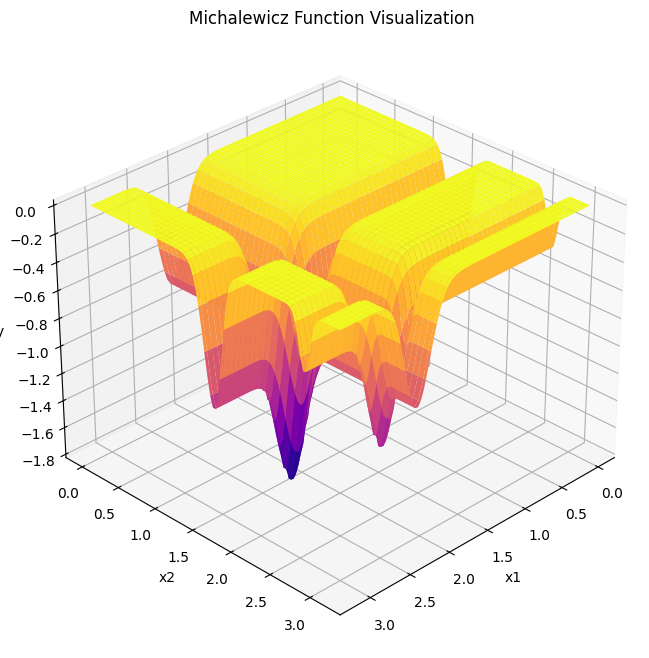

In [191]:
# Visualize Michalewicz function
visualize_func(x1, x2, y, func_name="Michalewicz")

### Ackley Function

In [192]:
# Define ackley function
def ackley_func(x1, x2, a=20.0, b=0.2, c=2.0 * np.pi):
    
    sum1 = x1**2 + x2**2
    sum2 = tf.cos(c * x1) + tf.cos(c * x2)
    
    term1 = -a * tf.exp(-b * tf.sqrt(sum1 / 2))
    term2 = -tf.exp(sum2 / 2)
    
    return term1 + term2 + a + tf.exp(1.0)

In [193]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-32.768, 32.768, 100, dtype=np.float32)
x2 = np.linspace(-32.768, 32.768, 100, dtype=np.float32)
x1, x2 = np.meshgrid(x1, x2)

y = ackley_func(x1, x2)

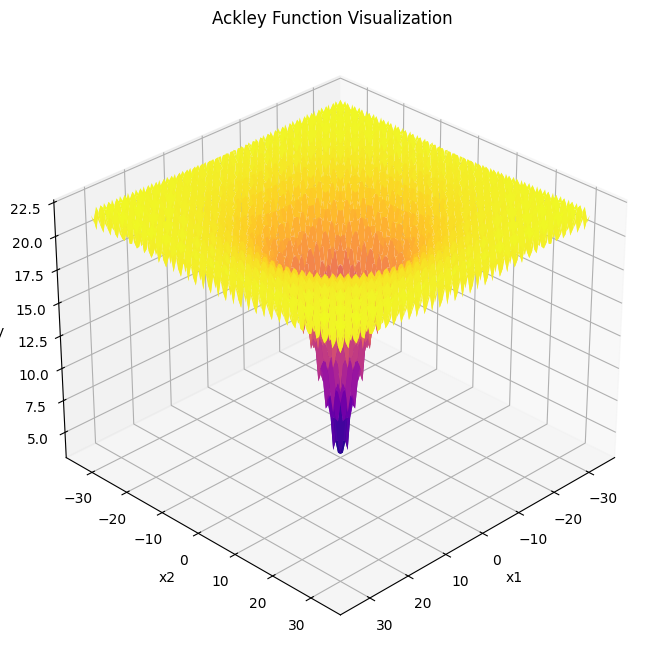

In [194]:
# Visualize Ackley function
visualize_func(x1, x2, y, func_name="Ackley")

### Trid Function

In [195]:
# Define the Trid function
def trid_func(x1, x2):
    term1 = (x1 - 1)**2 + (x2 - 1)**2
    term2 = x1 * x2
    return term1 - term2

In [196]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
x1, x2 = np.meshgrid(x1, x2)
y = trid_func(x1, x2)

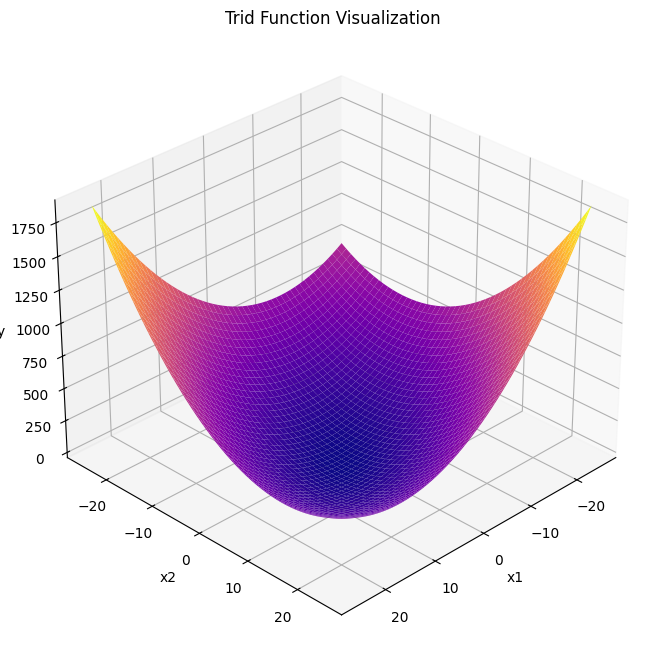

In [197]:
# Visualize Trid function
visualize_func(x1, x2, y, func_name="Trid")

## Explaining the problem to myself

#### 1. Function: 

Given a function  $f(x, y)$ , your goal is to minimize it using gradient descent. This means finding the point $(\hat x, \hat y)$ where the gradient of $f(x, y)$  is zero (or close).

#### 2. Gradient Descent

The gradient of  f(x, y)  is a vector containing the partial derivatives:

$\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$

At each step of gradient descent, you need to update both x and y based on the gradient:

$x_{\text{new}} = x - \eta \frac{\partial f}{\partial x}$


$y_{\text{new}} = y - \eta \frac{\partial f}{\partial y}$


## Optimizers with `tf.GradientTape`

#### Stochastic Gradient Descent (SGD) - `tf.GradientTape`

In [198]:
def sgd_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]

    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        w1.assign_sub(learning_rate * df_dw1)
        w2.assign_sub(learning_rate * df_dw2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [199]:
sgd_tape(michalewicz_func)

Converged on 1th iteration

x1: 0.10000000149011612, x2: 0.10000000149011612
At x1 & x2, y = 0.0


[[0.10000000149011612, 0.10000000149011612, 0.0]]

## Vanilla Momentum Optimizer - `tf.GradientTape`

In [200]:
def momentum_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
            
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [201]:
momentum_tape(six_hump_camel_func)

Iter 100th - x1 = -0.0907864049077034, x2 = 0.7105706334114075, y = -1.0315874814987183
Converged on 154th iteration

x1: -0.0899130329489708, x2: 0.7126482129096985
At x1 & x2, y = -1.0316283702850342


[[0.10000000149011612, 0.10000000149011612, 0.010190334171056747],
 [-0.0907864049077034, 0.7105706334114075, -1.0315874814987183]]

## Nesterov Accelerated Gradient Optimizer - `tf.GradientTape`

In [202]:
def nesterov_acc_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # friction
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1 + beta * m1, w2 + beta * m2) # evaluate ahead
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update momentums
        m1.assign(beta * m1 - learning_rate * df_dw1)
        m2.assign(beta * m2 - learning_rate * df_dw2)
        
        # update weights
        w1.assign_add(m1)
        w2.assign_add(m2)
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [203]:
nesterov_acc_tape(six_hump_camel_func)

Iter 100th - x1 = -0.09091490507125854, x2 = 0.7108205556869507, y = -1.0315945148468018
Converged on 132th iteration

x1: -0.0895344540476799, x2: 0.7125177383422852
At x1 & x2, y = -1.0316280126571655


[[0.10000000149011612, 0.10000000149011612, 0.010190334171056747],
 [0.06586240231990814, 0.13116081058979034, -0.04167833551764488],
 [0.015276115387678146, 0.21038933098316193, -0.1650703400373459],
 [-0.02209635078907013, 0.3443589210510254, -0.42374107241630554],
 [-0.04608716070652008, 0.5279110670089722, -0.8199309706687927],
 [-0.06522319465875626, 0.6949729919433594, -1.0271923542022705],
 [-0.0824456512928009, 0.7552417516708374, -1.015355110168457],
 [-0.09360328316688538, 0.7330634593963623, -1.0281422138214111],
 [-0.09636742621660233, 0.7082538604736328, -1.0312762260437012],
 [-0.09396648406982422, 0.7049939632415771, -1.0310548543930054],
 [-0.09091490507125854, 0.7108205556869507, -1.0315945148468018],
 [-0.08936682343482971, 0.714175283908844, -1.031607985496521],
 [-0.08916985988616943, 0.7138117551803589, -1.0316150188446045],
 [-0.08947035670280457, 0.7126626372337341, -1.031627893447876]]

## Adaptive Gradient Moment (AdaGrad)

In [204]:
def adagrad_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign_add(df_dw1 * df_dw1)
        s2.assign_add(df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 100 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [205]:
adagrad_tape(six_hump_camel_func, max_iters=1000000)

Iter 100th - x1 = 0.08191104978322983, x2 = 0.1193164512515068, y = -0.019618380814790726
Iter 200th - x1 = 0.07418226450681686, x2 = 0.12828503549098969, y = -0.033279899507761
Iter 300th - x1 = 0.06838737428188324, x2 = 0.1352994292974472, y = -0.04396910220384598
Iter 400th - x1 = 0.06359896063804626, x2 = 0.14129137992858887, y = -0.05312792584300041
Iter 500th - x1 = 0.05945664644241333, x2 = 0.14662428200244904, y = -0.061314016580581665
Iter 600th - x1 = 0.05577510595321655, x2 = 0.15148554742336273, y = -0.06881280988454819
Iter 700th - x1 = 0.05244407057762146, x2 = 0.15598684549331665, y = -0.07579319179058075
Iter 800th - x1 = 0.04939156398177147, x2 = 0.16020138561725616, y = -0.08236505836248398
Iter 900th - x1 = 0.04656750708818436, x2 = 0.16418012976646423, y = -0.08860442787408829
Iter 1000th - x1 = 0.043935321271419525, x2 = 0.16796033084392548, y = -0.09456650167703629
Iter 1100th - x1 = 0.04146738722920418, x2 = 0.17157018184661865, y = -0.10029277950525284
Iter 1200

[[0.10000000149011612, 0.10000000149011612, 0.010190334171056747],
 [0.08191104978322983, 0.1193164512515068, -0.019618380814790726],
 [0.07418226450681686, 0.12828503549098969, -0.033279899507761],
 [0.06838737428188324, 0.1352994292974472, -0.04396910220384598],
 [0.06359896063804626, 0.14129137992858887, -0.05312792584300041],
 [0.05945664644241333, 0.14662428200244904, -0.061314016580581665],
 [0.05577510595321655, 0.15148554742336273, -0.06881280988454819],
 [0.05244407057762146, 0.15598684549331665, -0.07579319179058075],
 [0.04939156398177147, 0.16020138561725616, -0.08236505836248398],
 [0.04656750708818436, 0.16418012976646423, -0.08860442787408829],
 [0.043935321271419525, 0.16796033084392548, -0.09456650167703629],
 [0.04146738722920418, 0.17157018184661865, -0.10029277950525284],
 [0.03914221003651619, 0.17503178119659424, -0.10581555962562561],
 [0.036942653357982635, 0.1783626824617386, -0.11116033047437668],
 [0.03485475480556488, 0.18157711625099182, -0.1163477152585983

## Root Mean Square Propagation (RMSProp)

In [206]:
def rmsprop_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    beta = 0.9 # decay rate
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2) # first prediction
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update second moments
        s1.assign(beta * s1 + (1 - beta) * df_dw1 * df_dw1)
        s2.assign(beta * s2 + (1 - beta) * df_dw2 * df_dw2)
        
        # update weights
        w1.assign_sub(learning_rate * df_dw1/(tf.sqrt(s1 + epsilon)))
        w2.assign_sub(learning_rate * df_dw2/(tf.sqrt(s2 + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [207]:
rmsprop_tape(six_hump_camel_func)

Iter 100th - x1 = 0.0013229710748419166, x2 = 0.21520058810710907, y = -0.17637452483177185
Iter 200th - x1 = -0.03973238542675972, x2 = 0.3179374039173126, y = -0.3697877526283264
Iter 300th - x1 = -0.052910204976797104, x2 = 0.41875123977661133, y = -0.5893909931182861
Iter 400th - x1 = -0.06545598059892654, x2 = 0.5179039239883423, y = -0.8019208908081055
Iter 500th - x1 = -0.0777055099606514, x2 = 0.6143149733543396, y = -0.9635197520256042
Iter 600th - x1 = -0.08865158259868622, x2 = 0.6998263597488403, y = -1.0303142070770264
Converged on 637th iteration

x1: -0.08932711184024811, x2: 0.7125625610351562
At x1 & x2, y = -1.0316274166107178


[[0.10000000149011612, 0.10000000149011612, 0.010190334171056747],
 [0.08306774497032166, 0.11791153997182846, -0.017543569207191467],
 [0.07244867831468582, 0.12990957498550415, -0.036017511039972305],
 [0.06280401349067688, 0.14104416966438293, -0.05338796600699425],
 [0.05351501703262329, 0.1518867313861847, -0.07058306783437729],
 [0.044412754476070404, 0.16259345412254333, -0.08784791082143784],
 [0.03545183315873146, 0.17321771383285522, -0.10525155812501907],
 [0.02663201466202736, 0.18378141522407532, -0.1228087991476059],
 [0.017975041642785072, 0.19429560005664825, -0.1405179798603058],
 [0.009519392624497414, 0.20476707816123962, -0.15837416052818298],
 [0.0013229710748419166, 0.21520058810710907, -0.17637452483177185],
 [-0.006528265308588743, 0.2255997210741043, -0.1945219337940216],
 [-0.01390458270907402, 0.23596714437007904, -0.21282845735549927],
 [-0.02060788869857788, 0.24630485475063324, -0.23132029175758362],
 [-0.02634565904736519, 0.2566141188144684, -0.250043243

## Adaptive Moment Estimation (Adam)

In [208]:
def adam_tape(test_func, max_iters=100000, learning_rate=0.001, initial_guess = None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]
    
    grad_points = []
    
    # initialize weights
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)
        
    # initialize momentum
    m1 = tf.Variable(0.0, tf.float32)
    m2 = tf.Variable(0.0, tf.float32)
    
    # initialize second moment estimate
    s1 = tf.Variable(0.0, tf.float32)
    s2 = tf.Variable(0.0, tf.float32)
    
    beta1, beta2, epsilon = 0.9, 0.999, 1e-8  # regularization parameter to avoid division by zero
    
    epsilon = 10e-10 # regularization parameter to avoid division by zero
    
    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])
    
    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)
        
        # gradients from tape
        df_dw1, df_dw2 = tape.gradient(y, [w1, w2])
        
        # update momentum
        m1.assign(beta1 * m1 + (1 - beta1) * df_dw1)
        m2.assign(beta1 * m2 + (1 - beta1) * df_dw2)
        
        # update second moments
        s1.assign(beta2 * s1 + (1 - beta2) * df_dw1 * df_dw1)
        s2.assign(beta2 * s2 + (1 - beta2) * df_dw2 * df_dw2)
        
        # adjusted momentum and second moments calculations
        m1_hat = m1 / (1 - beta1 ** t)
        m2_hat = m2 / (1 - beta1 ** t)
        
        s1_hat = s1 / (1 - beta2 ** t)
        s2_hat = s2 / (1 - beta2 ** t)
        
        # update weights
        w1.assign_sub(learning_rate * m1_hat/(tf.sqrt(s1_hat + epsilon)))
        w2.assign_sub(learning_rate * m2_hat/(tf.sqrt(s2_hat + epsilon)))
        
        pred_2 = test_func(w1, w2).numpy() # current prediction
        
        if abs(pred_2 - pred_1) < 1e-13: # stopping criterion
            print(f"\nConverged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(test_func(w1, w2))])
        
        if t % 100 == 0:
            print(f"Iter {t}th - x1 = {float(w1)}, x2 = {float(w2)}, y = {float(test_func(w1, w2))}")
            
    print(f"\nx1: {float(w1)}, x2: {float(w2)}")
    print("At x1 & x2, y =", float(test_func(w1, w2)))
    
    return grad_points

In [209]:
adam_tape(six_hump_camel_func)

Iter 100th - x1 = 0.01570955477654934, x2 = 0.21355827152729034, y = -0.16976654529571533
Iter 200th - x1 = -0.02808465249836445, x2 = 0.34564200043678284, y = -0.42733633518218994
Iter 300th - x1 = -0.05118921026587486, x2 = 0.4726889431476593, y = -0.7077764868736267
Iter 400th - x1 = -0.0674939975142479, x2 = 0.5779920816421509, y = -0.9107081890106201
Iter 500th - x1 = -0.07902907580137253, x2 = 0.6504737734794617, y = -1.0028613805770874
Iter 600th - x1 = -0.08565624803304672, x2 = 0.6895293593406677, y = -1.027416706085205
Iter 700th - x1 = -0.08854477852582932, x2 = 0.7056431770324707, y = -1.0312321186065674
Iter 800th - x1 = -0.08951131254434586, x2 = 0.7108824849128723, y = -1.0316028594970703

Converged on 867th iteration

x1: -0.08972209692001343, x2: 0.7120142579078674
At x1 & x2, y = -1.0316250324249268


[[0.10000000149011612, 0.10000000149011612, 0.010190334171056747],
 [0.09002599865198135, 0.11003613471984863, -0.0056583210825920105],
 [0.08019673824310303, 0.1202545166015625, -0.02172478288412094],
 [0.07063542306423187, 0.13076946139335632, -0.03809071332216263],
 [0.061434343457221985, 0.14163503050804138, -0.05486416071653366],
 [0.05265294760465622, 0.15286138653755188, -0.07216061651706696],
 [0.044324785470962524, 0.16443286836147308, -0.0900893285870552],
 [0.03646575286984444, 0.17632149159908295, -0.10874591767787933],
 [0.029080217704176903, 0.18849444389343262, -0.1282084435224533],
 [0.022164633497595787, 0.2009177953004837, -0.14853571355342865],
 [0.01570955477654934, 0.21355827152729034, -0.16976654529571533],
 [0.009700794704258442, 0.2263839691877365, -0.1919201761484146],
 [0.004120172001421452, 0.23936454951763153, -0.21499638259410858],
 [-0.0010538267670199275, 0.25247126817703247, -0.23897655308246613],
 [-0.00584539445117116, 0.2656770348548889, -0.2638249099

In [210]:
adam_tape(michalewicz_func)


Converged on 1th iteration

x1: 0.10000000149011612, x2: 0.10000000149011612
At x1 & x2, y = 0.0


[[0.10000000149011612, 0.10000000149011612, 0.0]]

#### Define a function that plots the descent

In [211]:
def plot_function_descent(test_func, optimizer, x1_range=x1, x2_range=x2):
    x1, x2 = np.meshgrid(x1_range, x2_range) # generate mesh of both values
    
    y = test_func(x1, x2) # Generate z-axis values
    
    points = optimizer(test_func) # collect gradient points from select optimizer
    points = np.array(points)
    
    p1, p2, q = points[:,0], points[:,1], points[:,2] # deconstruct the individual point values
    
    # Plot the surface
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1, x2, y, cmap="viridis")
    
    # Plot gradient path
    ax.plot(p1, p2, q, color="r", label="Gradient path")
    
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.legend()
    ax.view_init(elev=30, azim=60)
    plt.show()
    

Iter 100th - x1 = 0.01570955477654934, x2 = 0.21355827152729034, y = -0.16976654529571533
Iter 200th - x1 = -0.02808465249836445, x2 = 0.34564200043678284, y = -0.42733633518218994
Iter 300th - x1 = -0.05118921026587486, x2 = 0.4726889431476593, y = -0.7077764868736267
Iter 400th - x1 = -0.0674939975142479, x2 = 0.5779920816421509, y = -0.9107081890106201
Iter 500th - x1 = -0.07902907580137253, x2 = 0.6504737734794617, y = -1.0028613805770874
Iter 600th - x1 = -0.08565624803304672, x2 = 0.6895293593406677, y = -1.027416706085205
Iter 700th - x1 = -0.08854477852582932, x2 = 0.7056431770324707, y = -1.0312321186065674
Iter 800th - x1 = -0.08951131254434586, x2 = 0.7108824849128723, y = -1.0316028594970703

Converged on 867th iteration

x1: -0.08972209692001343, x2: 0.7120142579078674
At x1 & x2, y = -1.0316250324249268


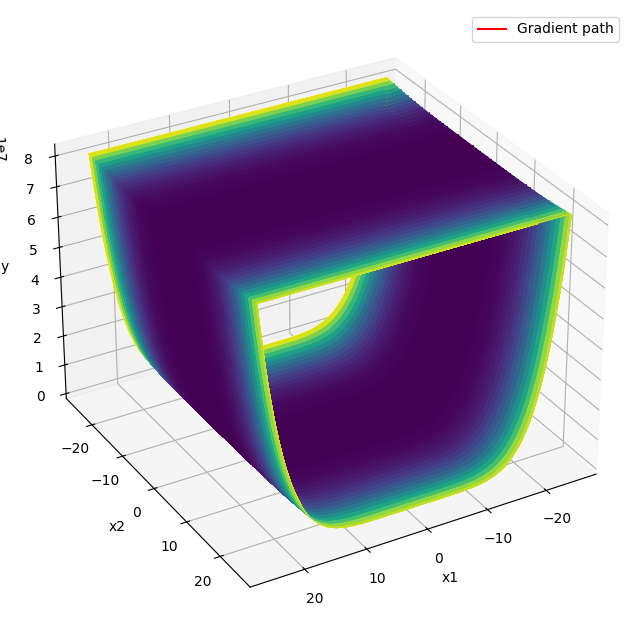

In [212]:
# Sample points on x1 and x2 axis
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)

plot_function_descent(six_hump_camel_func, optimizer=adam_tape)

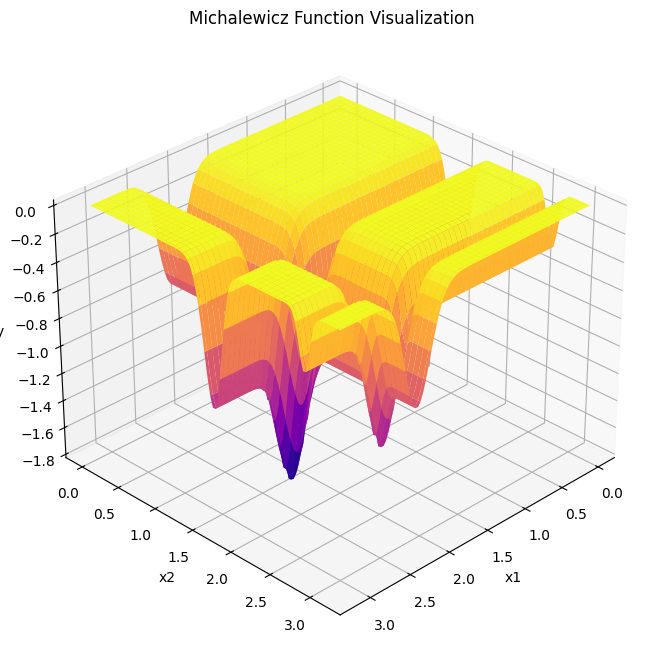

In [213]:
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= np.sin(x1) * (np.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= np.sin(x2) * (np.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

x1 = np.linspace(0, np.pi, 100)
x2 = np.linspace(0, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)
y = michalewicz_func(x1, x2)

# Visualize Michalewicz function
visualize_func(x1, x2, y, func_name="Michalewicz")

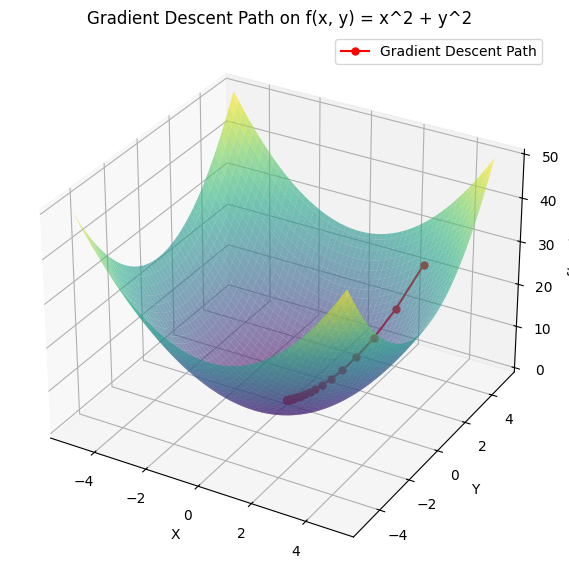

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x, y):
    return x**2 + y**2  # Example: simple 3D paraboloid

def gradient(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Gradient descent parameters
learning_rate = 0.1
n_iterations = 100
start_point = np.array([3, 4])  # Starting point (x, y)

# Gradient descent
path = [start_point]
point = start_point

for _ in range(n_iterations):
    grad = gradient(point[0], point[1])
    point = point - learning_rate * grad
    path.append(point)

# Convert path to a numpy array for easier manipulation
path = np.array(path)

# Create the meshgrid for plotting the surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the 3D surface and the gradient descent path
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), marker='o', color='r', markersize=5, label="Gradient Descent Path")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent Path on f(x, y) = x^2 + y^2')
ax.legend()

plt.show()

#### Define the Michalewicz function in terms of tensorflow


In [215]:
# Define the Michalewicz function in terms of tensorflow
def michalewicz_func(x1, x2, m=10):
    y = 0
    y -= tf.sin(x1) * (tf.sin(1 * x1**2 / np.pi) ** (2 * m))
    y -= tf.sin(x2) * (tf.sin(2 * x2**2 / np.pi) ** (2 * m))
    return y

test = np.array([2.20, 1.57])  # test function
michalewicz_func(2.20, 1.57)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.8011412620544434>

### Testing with manual initial guesses

In [216]:
sgd_tape(michalewicz_func,initial_guess=[1.5, 0.1])

Iter 100th - x1 = 1.5004887580871582, x2 = 0.10000000149011612, y = -0.00022312786313705146
Iter 200th - x1 = 1.500980257987976, x2 = 0.10000000149011612, y = -0.00022555328905582428
Iter 300th - x1 = 1.5014809370040894, x2 = 0.10000000149011612, y = -0.00022804891341365874
Iter 400th - x1 = 1.5019816160202026, x2 = 0.10000000149011612, y = -0.00023057028010953218
Iter 500th - x1 = 1.5024932622909546, x2 = 0.10000000149011612, y = -0.00023317482555285096
Iter 600th - x1 = 1.503005862236023, x2 = 0.10000000149011612, y = -0.00023581110872328281
Iter 700th - x1 = 1.5035271644592285, x2 = 0.10000000149011612, y = -0.0002385214902460575
Iter 800th - x1 = 1.504051685333252, x2 = 0.10000000149011612, y = -0.00024127804499585181
Iter 900th - x1 = 1.5045835971832275, x2 = 0.10000000149011612, y = -0.0002441036922391504
Iter 1000th - x1 = 1.505120038986206, x2 = 0.10000000149011612, y = -0.0002469848550390452
Iter 1100th - x1 = 1.5056637525558472, x2 = 0.10000000149011612, y = -0.00024993761326

[[1.5, 0.10000000149011612, -0.0002207408397225663],
 [1.5000488758087158, 0.10000000149011612, -0.0002209786034654826],
 [1.5000977516174316, 0.10000000149011612, -0.00022121661459095776],
 [1.5001466274261475, 0.10000000149011612, -0.00022145446564536542],
 [1.5001955032348633, 0.10000000149011612, -0.00022169297153595835],
 [1.500244379043579, 0.10000000149011612, -0.00022193128825165331],
 [1.500293254852295, 0.10000000149011612, -0.00022217027435544878],
 [1.5003421306610107, 0.10000000149011612, -0.00022240911494009197],
 [1.5003910064697266, 0.10000000149011612, -0.00022264858125708997],
 [1.5004398822784424, 0.10000000149011612, -0.00022288829495664686],
 [1.5004887580871582, 0.10000000149011612, -0.00022312786313705146],
 [1.500537633895874, 0.10000000149011612, -0.00022336804249789566],
 [1.5005865097045898, 0.10000000149011612, -0.00022360810544341803],
 [1.5006353855133057, 0.10000000149011612, -0.0002238492015749216],
 [1.5006842613220215, 0.10000000149011612, -0.000224089

#### Testing with `HeUniform` initial guesses

This generally improves the converges to some minimum (mostly local minima)

In [217]:
initializer = tf.keras.initializers.HeUniform()
W = tf.Variable(initializer(shape=(2, )))

grad_points = adam_tape(michalewicz_func, learning_rate=0.01, initial_guess=W)

Iter 100th - x1 = -1.3437377214431763, x2 = -0.28172242641448975, y = 4.951053142576711e-06
Iter 200th - x1 = -1.313349723815918, x2 = -0.28172242641448975, y = 2.1716609808208887e-06
Iter 300th - x1 = -1.292962670326233, x2 = -0.28172242641448975, y = 1.229110807798861e-06
Iter 400th - x1 = -1.277780294418335, x2 = -0.28172242641448975, y = 7.97517429873551e-07
Iter 500th - x1 = -1.265706181526184, x2 = -0.28172242641448975, y = 5.623767833640159e-07
Iter 600th - x1 = -1.2556791305541992, x2 = -0.28172242641448975, y = 4.1923473759197805e-07
Iter 700th - x1 = -1.2470970153808594, x2 = -0.28172242641448975, y = 3.2517837667001004e-07
Iter 800th - x1 = -1.2395843267440796, x2 = -0.28172242641448975, y = 2.598118840069219e-07
Iter 900th - x1 = -1.2328945398330688, x2 = -0.28172242641448975, y = 2.1241181968889578e-07
Iter 1000th - x1 = -1.226855993270874, x2 = -0.28172242641448975, y = 1.7686814146600227e-07
Iter 1100th - x1 = -1.2213445901870728, x2 = -0.28172242641448975, y = 1.4948349

In [218]:
grad_points

[[-1.5765057802200317, -0.28172242641448975, 0.0010941859800368547],
 [-1.4862538576126099, -0.28172242641448975, 0.00016266043530777097],
 [-1.428877830505371, -0.28172242641448975, 4.286924740881659e-05],
 [-1.3973355293273926, -0.28172242641448975, 1.976436578843277e-05],
 [-1.3799058198928833, -0.28172242641448975, 1.2721381608571392e-05],
 [-1.3694467544555664, -0.28172242641448975, 9.723000403027982e-06],
 [-1.3623065948486328, -0.28172242641448975, 8.077546226559207e-06],
 [-1.356755256652832, -0.28172242641448975, 6.985659183555981e-06],
 [-1.3520087003707886, -0.28172242641448975, 6.165297691040905e-06],
 [-1.347720742225647, -0.28172242641448975, 5.5040763982106e-06],
 [-1.3437377214431763, -0.28172242641448975, 4.951053142576711e-06],
 [-1.3399895429611206, -0.28172242641448975, 4.479487415665062e-06],
 [-1.3364399671554565, -0.28172242641448975, 4.072750471095787e-06],
 [-1.3330671787261963, -0.28172242641448975, 3.7191844057815615e-06],
 [-1.3298559188842773, -0.2817224264

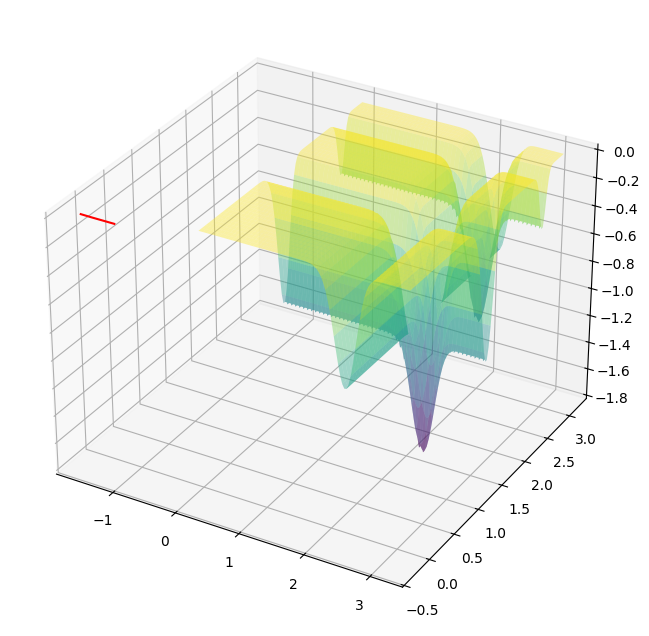

In [219]:
grad_points = np.array(grad_points)
x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

x1 = np.linspace(0, np.pi, 100)
x2 = np.linspace(0, np.pi, 100)
x1, x2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1,x2, michalewicz_func(x1,x2), cmap="viridis", alpha=0.4)
ax.plot(x, y, z, color="red")

## Optimize with `tf.keras.optimizers`

I recently noticed that, the question required that we utilize `Keras` optimizers.

In [220]:
def keras_optimizer_tape(test_func, optimizer, learning_rate=0.01, max_iters=100000, initial_guess=None):
    if initial_guess is None:
        initial_guess = [0.1, 0.1]

    grad_points = []
    
    optimizer = optimizer

    # Initialize variables
    w1 = tf.Variable(initial_guess[0], dtype=tf.float32)
    w2 = tf.Variable(initial_guess[1], dtype=tf.float32)

    pred_1 = test_func(w1, w2)
    grad_points.append([float(w1), float(w2), float(pred_1)])

    for t in range(1, max_iters + 1):
        with tf.GradientTape() as tape:
            y = test_func(w1, w2)

        grads = tape.gradient(y, [w1, w2])
        optimizer.apply_gradients(zip(grads, [w1, w2]))

        pred_2 = test_func(w1, w2).numpy()  # current prediction

        if abs(pred_2 - pred_1) < 1e-13:
            print(f"Converged on {t}th iteration")
            break
        pred_1 = pred_2

        if t % 10 == 0:
            grad_points.append([float(w1), float(w2), float(pred_1)])

        if t % 100 == 0:
            print(f"Iter {t} - x1 = {float(w1):.6f}, x2 = {float(w2):.6f}, y = {float(pred_1):.6f}")

    print(f"\nFinal: x1 = {float(w1):.6f}, x2 = {float(w2):.6f}")
    print(f"At x1 & x2, y = {float(test_func(w1, w2)):.6f}")

    return grad_points

In [221]:
# Define the optimizers
SGD = tf.keras.optimizers.SGD
Momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
Nesterov = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
Adagrad = tf.keras.optimizers.Adagrad
RMSProp = tf.keras.optimizers.RMSprop
Adam = tf.keras.optimizers.Adam

In [222]:
# Run optimizer
grad_points = keras_optimizer_tape(trid_func, SGD, initial_guess=[20.0, -20.0])

# Get gradient points
grad_points = np.array(grad_points)
x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

# Get function mesh points
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
x1, x2 = np.meshgrid(x1, x2)

# Plot graph
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x1,x2, trid_func(x1,x2), cmap="Reds", alpha=0.7)
ax.plot(x, y, z, color="blue")
ax.view_init(elev=45, azim=60)

TypeError: BaseOptimizer.apply_gradients() missing 1 required positional argument: 'grads_and_vars'

In [ ]:
# Mesh points
x1 = np.linspace(-25, 25, 100)
x2 = np.linspace(-25, 25, 100)
initial_guess=[0.1,0.1]
optimizer = tf.keras.optimizers.SGD

def optimize_and_plot(test_func, x1=x1, x2=x2, optimizer=optimizer, initial_guess=initial_guess, xlim=None):
    # Run optimizer
    grad_points = keras_optimizer_tape(test_func, optimizer=optimizer, initial_guess=initial_guess)

    # Get gradient points
    grad_points = np.array(grad_points)
    x, y, z = grad_points[:,0], grad_points[:,1], grad_points[:,2]

    # Mesh x1, and x2 points
    x1, x2 = np.meshgrid(x1, x2)

    # Plot graph
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x1,x2, test_func(x1,x2), cmap="Reds", alpha=0.7)
    ax.plot(x, y, z, color="blue")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    ax.set_xlim(xlim)
    ax.view_init(elev=45, azim=60)
    plt.show()

In [ ]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-2, 2, 100)
initial_guess=[-2.0, -4.0]
optimizer = tf.keras.optimizers.SGD

optimize_and_plot(six_hump_camel_func, x1, x2, optimizer=Momentum, xlim=[-5, 5])

